У цьому файлі представлено

Для початку імпортую необхідні бібліотеки, зчитую дані та переглядаю вміст файлу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('quora_question_pairs_train.csv.zip', index_col=0)
pd.set_option('display.max_colwidth', None)

In [ ]:
df = df.dropna(subset=['question1', 'question2'])

In [ ]:
df.head(10)

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
332278,459256,459257,The Iliad and the Odyssey in the Greek culture?,How do I prove that the pairs of three independent variables is also independent?,0
196656,297402,297403,What is practical management and what is strategic management?,What are the practical aspects of strategic management?,0
113125,184949,184950,How useful is MakeUseOf Answers?,"Is there any Q&A site that is not Yahoo answers, where hate speech is allowed?",0
266232,101283,163744,Which is the best place to reside in India and Why?,Which ia the best place to visit in India?,0
122738,17811,27517,Why do so many people ask questions on Quora that can be easily answered by any number of legitimate sources on the Web? Have they not heard of Google or Bing?,Why don't many people posting questions on Quora check Google first?,1
250052,363829,363830,I got a seat in engineering management in Kettering University. Is that good to go? Will that build my career? What opportunities will I have after doing that course?,I am a petroleum engineer. Got an offer from Scotland University for energy economics course. Should I go there? What are the job opportunities?,0
302372,425388,425389,Why do people avoid south facing homes?,"Why is a ""south facing"" home so important to some people?",0
168009,260327,260328,What is the best site to watch the Turkish drama Ask Laftan Anlamaz with English subtitles?,Is there a way that I can watch Kucuk Gelin (The Child Bride)-(a turkish drama) with english subtitles from seasons 2 till the last season?,0
402631,176809,185587,What is the best small business to start in Nagpur?,Which business/startup should I start in Nagpur which will have best chances of survival?,1


Перегляд співвідношення дуплікатів та недублікатів


In [ ]:
orig_duplicate_count = df.loc[df['is_duplicate'] == 1].shape[0]
print(f"Count of duplicate questions: {orig_duplicate_count}")

Count of duplicate questions: 119410


In [ ]:
orig_non_duplicate_count = df.loc[df['is_duplicate'] == 0].shape[0]
print(f"Count of non duplicate questions: {orig_non_duplicate_count}")

Count of non duplicate questions: 204019


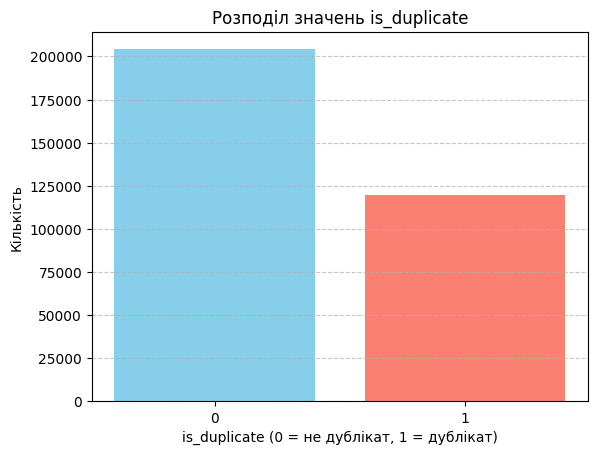

In [ ]:
counts = df['is_duplicate'].value_counts()

plt.bar(counts.index.astype(str), counts.values, color=['skyblue', 'salmon'])
plt.title('Розподіл значень is_duplicate')
plt.xlabel('is_duplicate (0 = не дублікат, 1 = дублікат)')
plt.ylabel('Кількість')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Імпорт бібліотек та завантаження стопслів

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt_tab')
nltk.download('stopwords')
english_stopwords = stopwords.words('english')
stemmer = SnowballStemmer(language='english')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
def remove_stopwords(question):
  stop_words = set(english_stopwords)

  word_tokens = word_tokenize(question)
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  filtered_sentence = []

  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)

  return ' '.join(filtered_sentence)

Видалення стопслів


In [ ]:
for index, row in df.iterrows():
  df.at[index, 'question1'] = remove_stopwords(row['question1'])
  df.at[index, 'question2'] = remove_stopwords(row['question2'])

In [ ]:
!pip install transformers torch --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.6 MB/s eta 0:00:00


In [ ]:
df.head(10)

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
332278,459256,459257,The Iliad Odyssey Greek culture ?,How I prove pairs three independent variables also independent ?,0
196656,297402,297403,What practical management strategic management ?,What practical aspects strategic management ?,0
113125,184949,184950,How useful MakeUseOf Answers ?,"Is Q & A site Yahoo answers , hate speech allowed ?",0
266232,101283,163744,Which best place reside India Why ?,Which ia best place visit India ?,0
122738,17811,27517,Why many people ask questions Quora easily answered number legitimate sources Web ? Have heard Google Bing ?,Why n't many people posting questions Quora check Google first ?,1
250052,363829,363830,I got seat engineering management Kettering University . Is good go ? Will build career ? What opportunities I course ?,I petroleum engineer . Got offer Scotland University energy economics course . Should I go ? What job opportunities ?,0
302372,425388,425389,Why people avoid south facing homes ?,Why `` south facing '' home important people ?,0
168009,260327,260328,What best site watch Turkish drama Ask Laftan Anlamaz English subtitles ?,Is way I watch Kucuk Gelin ( The Child Bride ) - ( turkish drama ) english subtitles seasons 2 till last season ?,0
402631,176809,185587,What best small business start Nagpur ?,Which business/startup I start Nagpur best chances survival ?,1


Розділення даних на тестові, тренувальні та валідаційні

In [4]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np
from transformers import DataCollatorWithPadding

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np
from transformers import DataCollatorWithPadding
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

## Завантаження моделі Bert та токенізатора


AutoTokenizer.from_pretrained(...) автоматично підбирає правильний токенізатор до вибраної моделі.

In [ ]:
model_path = "google-bert/bert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_path)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Також вказую:


*   num_labels=2 — кількість класів у задачі ("Not duplicate" та "Duplicate")  
*   id2label та label2id — словники відповідностей, для правильної інтерпритації числових міток при тренуванні.

In [6]:
id2label = {0: "Not duplicate", 1: "Duplicate"}
label2id = {"Not duplicate": 0, "Duplicate": 1}

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(model_path,
                                                           num_labels=2,
                                                           id2label=id2label,
                                                           label2id=label2id)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Вивід усіх шарів моделі

In [ ]:
for name, param in model.named_parameters():
   print(name, param.requires_grad)

bert.embeddings.word_embeddings.weight True
bert.embeddings.position_embeddings.weight True
bert.embeddings.token_type_embeddings.weight True
bert.embeddings.LayerNorm.weight True
bert.embeddings.LayerNorm.bias True
bert.encoder.layer.0.attention.self.query.weight True
bert.encoder.layer.0.attention.self.query.bias True
bert.encoder.layer.0.attention.self.key.weight True
bert.encoder.layer.0.attention.self.key.bias True
bert.encoder.layer.0.attention.self.value.weight True
bert.encoder.layer.0.attention.self.value.bias True
bert.encoder.layer.0.attention.output.dense.weight True
bert.encoder.layer.0.attention.output.dense.bias True
bert.encoder.layer.0.attention.output.LayerNorm.weight True
bert.encoder.layer.0.attention.output.LayerNorm.bias True
bert.encoder.layer.0.intermediate.dense.weight True
bert.encoder.layer.0.intermediate.dense.bias True
bert.encoder.layer.0.output.dense.weight True
bert.encoder.layer.0.output.dense.bias True
bert.encoder.layer.0.output.LayerNorm.weight True


Заморожування усіх шарів та розморожування pooling layers, що використовуються для класифікації та одинадцятого шару для підвищення точності передбачень моделі

In [ ]:
for name, param in model.base_model.named_parameters():
    param.requires_grad = False

for name, param in model.base_model.named_parameters():
    if "pooler" in name or "11" in name:
        param.requires_grad = True

In [ ]:
for name, param in model.named_parameters():
   print(name, param.requires_grad)

bert.embeddings.word_embeddings.weight False
bert.embeddings.position_embeddings.weight False
bert.embeddings.token_type_embeddings.weight False
bert.embeddings.LayerNorm.weight False
bert.embeddings.LayerNorm.bias False
bert.encoder.layer.0.attention.self.query.weight False
bert.encoder.layer.0.attention.self.query.bias False
bert.encoder.layer.0.attention.self.key.weight False
bert.encoder.layer.0.attention.self.key.bias False
bert.encoder.layer.0.attention.self.value.weight False
bert.encoder.layer.0.attention.self.value.bias False
bert.encoder.layer.0.attention.output.dense.weight False
bert.encoder.layer.0.attention.output.dense.bias False
bert.encoder.layer.0.attention.output.LayerNorm.weight False
bert.encoder.layer.0.attention.output.LayerNorm.bias False
bert.encoder.layer.0.intermediate.dense.weight False
bert.encoder.layer.0.intermediate.dense.bias False
bert.encoder.layer.0.output.dense.weight False
bert.encoder.layer.0.output.dense.bias False
bert.encoder.layer.0.output.Lay

## Підготовка тексту

In [7]:
def create_model_input(example):
  example["text"] = f"Question 1: {example['question1']}\nQuestion 2: {example['question2']}"
  return example

In [8]:
def preprocess_function(example):
    return tokenizer(
        example['text'],
        max_length=64,
        padding="max_length",
        truncation=True,
        return_tensors = "pt"
    )

In [9]:
def add_label(example):
    example["labels"] = example["is_duplicate"]
    return example

Створення словнику формату DatasetDict (словник з іменами сплітів як ключі (наприклад, 'train', 'test') і Dataset-об'єктами як значеннями)

In [ ]:
from datasets import Dataset, DatasetDict

train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

dataset_dict = DatasetDict({
    "train": train_dataset,
    "validation": val_dataset,
    "test": test_dataset
})


Приведення питань до формату, в якому вони будуть передаватися у модель

In [ ]:
dataset_dict = dataset_dict.map(create_model_input)

Map:   0%|          | 0/194057 [00:00<?, ? examples/s]

Map:   0%|          | 0/64686 [00:00<?, ? examples/s]

Map:   0%|          | 0/64686 [00:00<?, ? examples/s]

Вивід першого об'єкту словника

In [ ]:
dataset_dict["train"][0]

{'qid1': 274666,
 'qid2': 131224,
 'question1': 'How prepare interview ?',
 'question2': 'How one prepare interviews ?',
 'is_duplicate': 1,
 'id': 361953,
 'text': 'Question 1: How prepare interview ?\nQuestion 2: How one prepare interviews ?'}

In [ ]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['qid1', 'qid2', 'question1', 'question2', 'is_duplicate', 'id', 'text'],
        num_rows: 194057
    })
    validation: Dataset({
        features: ['qid1', 'qid2', 'question1', 'question2', 'is_duplicate', 'id', 'text'],
        num_rows: 64686
    })
    test: Dataset({
        features: ['qid1', 'qid2', 'question1', 'question2', 'is_duplicate', 'id', 'text'],
        num_rows: 64686
    })
})

Додавання labels до features

In [ ]:
dataset_dict = dataset_dict.map(add_label)

Map:   0%|          | 0/194057 [00:00<?, ? examples/s]

Map:   0%|          | 0/64686 [00:00<?, ? examples/s]

Map:   0%|          | 0/64686 [00:00<?, ? examples/s]

In [ ]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['qid1', 'qid2', 'question1', 'question2', 'is_duplicate', 'id', 'text', 'labels'],
        num_rows: 194057
    })
    validation: Dataset({
        features: ['qid1', 'qid2', 'question1', 'question2', 'is_duplicate', 'id', 'text', 'labels'],
        num_rows: 64686
    })
    test: Dataset({
        features: ['qid1', 'qid2', 'question1', 'question2', 'is_duplicate', 'id', 'text', 'labels'],
        num_rows: 64686
    })
})

Токенізація датасету

In [ ]:
tokenized_datasets = dataset_dict.map(preprocess_function, batched=True)

Map:   0%|          | 0/194057 [00:00<?, ? examples/s]

Map:   0%|          | 0/64686 [00:00<?, ? examples/s]

Map:   0%|          | 0/64686 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['qid1', 'qid2', 'question1', 'question2', 'is_duplicate', 'id', 'text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 194057
    })
    validation: Dataset({
        features: ['qid1', 'qid2', 'question1', 'question2', 'is_duplicate', 'id', 'text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 64686
    })
    test: Dataset({
        features: ['qid1', 'qid2', 'question1', 'question2', 'is_duplicate', 'id', 'text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 64686
    })
})

In [ ]:
tokenized_datasets["train"][0]["input_ids"]

[101,
 3160,
 1015,
 1024,
 2129,
 7374,
 4357,
 1029,
 3160,
 1016,
 1024,
 2129,
 2028,
 7374,
 7636,
 1029,
 102,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

Наступним кроком завантажую DataCollatorWithPadding для коректного формування батчів

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [10]:
!pip install evaluate --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.0 MB/s eta 0:00:00


In [11]:
import evaluate

# Завантажуємо метрики
accuracy = evaluate.load("accuracy")
auc_score = evaluate.load("roc_auc")

def compute_metrics(eval_pred):
    # Отримуємо передбачення та справжні мітки
    predictions, labels = eval_pred

    # Застосовуємо softmax, щоб отримати ймовірності
    probabilities = np.exp(predictions) / np.exp(predictions).sum(-1, keepdims=True)

    # Беремо ймовірності позитивного класу для обчислення AUC
    positive_class_probs = probabilities[:, 1]

    # Обчислюємо AUC
    auc = np.round(auc_score.compute(prediction_scores=positive_class_probs, references=labels)['roc_auc'], 3)

    # Отримуємо передбачені класи (найбільш імовірні)
    predicted_classes = np.argmax(predictions, axis=1)

    # Обчислюємо accuracy
    acc = np.round(accuracy.compute(predictions=predicted_classes, references=labels)['accuracy'], 3)

    return {"Accuracy": acc, "AUC": auc}

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## Тренування моделі

Встановлення гіперпараметрів (learning rate, розмір батчів та кількість епох) та оголошення аргументів для тренування

In [ ]:
from torch.utils.data import DataLoader

lr = 5e-4
batch_size = 16
num_epochs = 10

training_args = TrainingArguments(
    output_dir="bert-phishing-classifier",
    learning_rate=lr,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    logging_strategy="epoch",
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

Ініціалізація трейнера

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    # data_collator=data_collator,
    compute_metrics=compute_metrics,
)


<ipython-input-35-394983934fdc>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Тренування моделі через трейнер

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: polina03232003 (polina03232003-v-n-karazin-kharkiv-national-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,Auc
1,0.472100,0.419230,0.796000,0.877000
2,0.436800,0.403525,0.803000,0.888000
3,0.421100,0.399574,0.807000,0.892000
4,0.410700,0.385699,0.815000,0.897000
5,0.403100,0.380582,0.819000,0.900000
6,0.396200,0.383759,0.819000,0.903000
7,0.390700,0.373992,0.822000,0.904000
8,0.386500,0.390077,0.815000,0.906000
9,0.380200,0.369024,0.825000,0.907000
10,0.377700,0.368078,0.826000,0.908000


TrainOutput(global_step=121290, training_loss=0.4075189394671346, metrics={'train_runtime': 10984.1027, 'train_samples_per_second': 176.671, 'train_steps_per_second': 11.042, 'total_flos': 6.38231775874944e+16, 'train_loss': 0.4075189394671346, 'epoch': 10.0})

Тестування моделі на тестовому датасеті та отримання метрик за результатами

In [ ]:
metrics = trainer.evaluate(eval_dataset=tokenized_datasets["test"])

In [ ]:
metrics

{'eval_loss': 0.37050768733024597,
 'eval_Accuracy': 0.823,
 'eval_AUC': 0.907,
 'eval_runtime': 229.9331,
 'eval_samples_per_second': 281.325,
 'eval_steps_per_second': 17.583,
 'epoch': 10.0}

## Завантаження моделі на huggingface

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
trainer.push_to_hub("bert-duplicate-classifier")

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

events.out.tfevents.1749436763.8ec9dc29e2de.306.0:   0%|          | 0.00/11.3k [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

events.out.tfevents.1749448331.8ec9dc29e2de.306.1:   0%|          | 0.00/465 [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.30k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/polinaShyshkina/bert-phishing-classifier/commit/eddc6027522bf396570f902b43bdfd40bde6b170', commit_message='bert-duplicate-classifier', commit_description='', oid='eddc6027522bf396570f902b43bdfd40bde6b170', pr_url=None, repo_url=RepoUrl('https://huggingface.co/polinaShyshkina/bert-phishing-classifier', endpoint='https://huggingface.co', repo_type='model', repo_id='polinaShyshkina/bert-phishing-classifier'), pr_revision=None, pr_num=None)

Завантаження своєї моделі з huggingface

In [13]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("polinaShyshkina/bert-phishing-classifier")
my_model = AutoModelForSequenceClassification.from_pretrained("polinaShyshkina/bert-phishing-classifier")

In [14]:
my_model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
df.head(20)

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
332278,459256,459257,The Iliad Odyssey Greek culture ?,How I prove pairs three independent variables also independent ?,0
196656,297402,297403,What practical management strategic management ?,What practical aspects strategic management ?,0
113125,184949,184950,How useful MakeUseOf Answers ?,"Is Q & A site Yahoo answers , hate speech allowed ?",0
266232,101283,163744,Which best place reside India Why ?,Which ia best place visit India ?,0
122738,17811,27517,Why many people ask questions Quora easily answered number legitimate sources Web ? Have heard Google Bing ?,Why n't many people posting questions Quora check Google first ?,1
250052,363829,363830,I got seat engineering management Kettering University . Is good go ? Will build career ? What opportunities I course ?,I petroleum engineer . Got offer Scotland University energy economics course . Should I go ? What job opportunities ?,0
302372,425388,425389,Why people avoid south facing homes ?,Why `` south facing '' home important people ?,0
168009,260327,260328,What best site watch Turkish drama Ask Laftan Anlamaz English subtitles ?,Is way I watch Kucuk Gelin ( The Child Bride ) - ( turkish drama ) english subtitles seasons 2 till last season ?,0
402631,176809,185587,What best small business start Nagpur ?,Which business/startup I start Nagpur best chances survival ?,1


Перевірка передбачення на вихідному датасеті, для порівнянням з реальним числом дублікатів та не дублікатів

In [ ]:
similarity_treshold = 0.85 # Поріг схожості для питань
unsimilarity_treshold = 0.3 # Поріг несхожості для питань
duplicate_count = 0 # Кількість дублікатів питань
not_duplicate_count = 0 # Кількість питань що не є дублікатами
max_count = 1000 # Кількість питань, на яких буде виконано порівняння
counter = 0 # Лічильник для циклу
for index, row in df.iterrows():
  input = create_model_input(row)['text']; # Створення рядку для входу в модель
  input = tokenizer(input, return_tensors="pt") # Токенізація тексту
  device = model.device # Отримання девайсу на якому створено модель

  input_data = {key: value.to(device) for key, value in input.items()} # Переведення вхідних даних на такий самий девайс як і у моделі, для уникнення помилки
  res = model(**input_data) # Отримання результату з моделі
  res = torch.nn.functional.softmax(res["logits"], dim=-1) # Прогін результату через softmax, для перетворення результатів схожості та несхожості у вигляд [0; 1]
  similarity = res.cpu().detach().numpy()[0][1] # Отримання значення схожості
  unsimilarity = res.cpu().detach().numpy()[0][0] # Отримання значення несхожості

  if similarity >= similarity_treshold or unsimilarity <= unsimilarity_treshold: # Порівняння отриманих значень схожості і несхожості з відповідними порогами
    duplicate_count += 1
  else:
    not_duplicate_count += 1

  counter += 1

  if counter == max_count:
    break

Порівняння результатів передбачень моделі

In [ ]:
print(f"Original duplicate count: {orig_duplicate_count}")
print(f"Predicted duplicate count: {duplicate_count}")

Original duplicate count: 357
Predicted duplicate count: 280


In [ ]:
print(f"Original non-duplicate count: {orig_non_duplicate_count}")
print(f"Predicted non-duplicate count: {not_duplicate_count}")

Original non-duplicate count: 643
Predicted non-duplicate count: 720


## Перевірка роботи моделі на тестовому датасеті

In [15]:
test_df = pd.read_csv('quora_question_pairs_test.csv.zip', index_col=0)
pd.set_option('display.max_colwidth', None)

In [16]:
test_df = test_df.dropna(subset=['question1', 'question2'])

In [17]:
for index, row in test_df.iterrows():
  test_df.at[index, 'question1'] = remove_stopwords(row['question1'])
  test_df.at[index, 'question2'] = remove_stopwords(row['question2'])

In [18]:
test_df.head(100)

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
305985,429434,429435,Why beef banned India pork well ?,Is beef banned india ?,0
5193,10230,10231,At valuation Homejoy raise money December 2013 ?,"Should wealthy founder self-fund second startup raise money high valuation getting traction , raise money low valuation traction ?",0
123326,199422,199423,How judge ?,How I judge love ?,0
368557,327674,498931,Are Adderall meth ?,Are concerta meth test ?,0
369226,499645,499646,"If internet access one site rest life , site would pick ?",Why .co.uk British internet sites .fr French ones ?,0
...,...,...,...,...,...
1508,3003,3004,How I Publish Theses dentistry International Library thesis ?,How I Publish Theses Education International Library thesis ?,0
248382,23539,361797,Is possible solve mathematical problem ?,How I solve mathematical problem ?,0
208587,312626,312627,How many ways save water ?,How save water ?,1


In [19]:
from datasets import Dataset, DatasetDict

testing_dataset = Dataset.from_pandas(test_df)

test_dataset_dict = DatasetDict({
    "test": testing_dataset
})

In [20]:
test_dataset_dict = test_dataset_dict.map(create_model_input)

Map:   0%|          | 0/80858 [00:00<?, ? examples/s]

In [21]:
test_dataset_dict["test"][0]

{'qid1': 429434,
 'qid2': 429435,
 'question1': 'Why beef banned India pork well ?',
 'question2': 'Is beef banned india ?',
 'is_duplicate': 0,
 'id': 305985,
 'text': 'Question 1: Why beef banned India pork well ?\nQuestion 2: Is beef banned india ?'}

In [22]:
test_dataset_dict

DatasetDict({
    test: Dataset({
        features: ['qid1', 'qid2', 'question1', 'question2', 'is_duplicate', 'id', 'text'],
        num_rows: 80858
    })
})

In [23]:
test_dataset_dict = test_dataset_dict.map(add_label)

Map:   0%|          | 0/80858 [00:00<?, ? examples/s]

In [24]:
test_tokenized_datasets = test_dataset_dict.map(preprocess_function, batched=True)

Map:   0%|          | 0/80858 [00:00<?, ? examples/s]

Створення трейнера

In [25]:
trainer = Trainer(
    model=model,
    tokenizer=tokenizer,
    # data_collator=data_collator,
    compute_metrics=compute_metrics,
)


<ipython-input-25-558845020>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Генерування передбачень

In [26]:
predictions = trainer.predict(test_tokenized_datasets["test"])

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: polina03232003 (polina03232003-v-n-karazin-kharkiv-national-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [27]:
predictions

PredictionOutput(predictions=array([[-0.6883424 ,  0.6702428 ],
       [ 1.7492917 , -1.7263767 ],
       [ 1.3378193 , -1.285799  ],
       ...,
       [-1.1182113 ,  1.0792327 ],
       [-0.5541332 ,  0.5381051 ],
       [ 0.88403213, -0.83130944]], dtype=float32), label_ids=array([0, 0, 0, ..., 1, 1, 0]), metrics={'test_loss': 0.3703625202178955, 'test_model_preparation_time': 0.0045, 'test_Accuracy': 0.823, 'test_AUC': 0.907, 'test_runtime': 305.2534, 'test_samples_per_second': 264.888, 'test_steps_per_second': 33.113})

Виведення метрик за результатами роботи моделі

In [28]:
logits = predictions.predictions
labels = predictions.label_ids

# Використовуємо нашу написану раніше функцію compute_metrics
metrics = compute_metrics((logits, labels))
print(metrics)

{'Accuracy': np.float64(0.823), 'AUC': np.float64(0.907)}
